In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None
import math

In [2]:
#Liqs=ss.import_data('Clean_Oneill_SCSSCalc_July2020_Fixed_Sulfide.xlsx', sheet_name="Python_Input")
Liq=pd.read_excel('PySulfSat_Input.xlsx', sheet_name="Sheet1")

In [4]:
Liq

,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe/(Fe+Cu+Ni),H2O_Liq,S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2
0,FeS,10000.0,1250,-2.0,-9.243243,51.28,0.89,17.13,7.13,NaN,7.19,10.69,2.58,0.83,NaN,0.999559,0.000000,1040.411979,-3.479508,0.060258,0.001857,7.325000,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.000000,NaN,0.886857,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN
1,Fe90,10000.0,1250,-2.0,-9.243243,50.99,0.71,16.85,8.51,NaN,7.08,10.35,2.51,0.84,NaN,0.928749,0.000000,1029.266333,-3.514465,0.072085,0.002146,7.325000,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.000000,NaN,0.887207,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN
2,Fe80,10000.0,1250,-2.0,-9.243243,49.60,1.11,17.33,6.88,NaN,7.23,10.57,2.53,0.80,NaN,0.788135,0.000000,829.086253,-3.482819,0.059264,0.001821,7.325000,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.000000,NaN,0.888682,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN
3,Fe80-24h,10000.0,1250,-2.0,-9.243243,50.34,1.09,17.29,5.92,NaN,7.21,10.51,2.54,0.80,NaN,0.800000,0.000000,802.017741,-3.467341,0.051053,0.001593,7.325000,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.000000,NaN,0.886915,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN
4,Fe80-3h,10000.0,1250,-2.0,-9.243243,52.68,1.09,16.88,6.95,NaN,7.41,10.52,2.53,0.81,NaN,0.800000,0.000000,822.763945,-3.486304,0.057929,0.001773,7.325000,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.000000,NaN,0.885100,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,NaN,5000.0,800,-2.0,-15.708867,77.30,0.00,13.73,2.17,0.0,0.32,0.39,4.40,2.01,NaN,1.000000,10.193727,74.495171,-2.805635,0.017288,0.001045,11.531376,2.174942,-11.040147,4.193695,-0.614780,-0.940269,0.057084,NaN,3.186959,0.000000,NaN,0.168830,-1.778864,0.353363,0.155648,-1.860160,0.091006,-2.396830,-1.399770,NaN,0.000932,-9.819302,74.495171,NaN,-0.454219,-9.819302,74.495171
64,Rhyolite H2O-saturated 1000℃,1.0,1000,-2.0,-12.330286,77.30,0.00,13.73,2.17,0.0,0.32,0.39,4.40,2.01,NaN,1.000000,0.099776,2.972267,-2.937752,0.017522,0.000928,9.279131,1.879437,-7.881592,4.180253,-0.517429,-0.386146,0.000012,NaN,4.674228,0.000000,NaN,0.001784,-6.328848,0.558493,0.003524,-5.648285,0.000022,-10.710504,-5.641973,NaN,0.000786,-11.465498,2.972267,NaN,-0.382857,-11.465498,2.972267
65,NaN,1000.0,1000,-2.0,-12.297469,77.30,0.00,13.73,2.17,0.0,0.32,0.39,4.40,2.01,NaN,1.000000,3.819136,93.252649,-2.972817,0.017580,0.000899,9.279131,1.881093,-7.879937,4.176946,-0.517240,-0.386146,0.011929,NaN,4.684683,0.000000,NaN,0.066343,-2.712914,0.558493,0.095678,-2.346763,0.018504,-3.989768,-2.169958,NaN,0.000786,-7.991827,93.252649,NaN,-0.382857,-7.991827,93.252649
66,NaN,3000.0,1000,-2.0,-12.231770,77.30,0.00,13.73,2.17,0.0,0.32,0.39,4.40,2.01,NaN,1.000000,7.379759,160.556078,-3.041203,0.017689,0.000845,9.279131,1.884188,-7.876841,4.170791,-0.516886,-0.386146,0.033371,NaN,4.703421,0.000000,NaN,0.124790,-2.081120,0.558493,0.149538,-1.900205,0.050021,-2.995304,-1.611644,NaN,0.000786,-7.430417,160.556078,NaN,-0.382857,-7.430417,160.556078


In [6]:
logfo2=Liq['logfO2']
P_kbar=Liq['P(bar)']/1000
T_K=Liq['T(deg C)']+273
FeFeNiCu=Liq['Fe/(Fe+Cu+Ni)']

## How it was supposed to be used

In [7]:
CalcS=ss.calculate_LZ2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
 Fe_FeNiCu_Sulf=FeFeNiCu, logfo2=logfo2)
CalcS.head()

,SCSS_Tot,Fe_FeNiCu_Sulf,Fe3Fet_Liq,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe/(Fe+Cu+Ni),H2O_Liq,S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2
0,1040.063853,0.999559,0.058107,FeS,10000.0,1250,-2.0,-9.243243,51.28,0.89,17.13,7.13,NaN,7.19,10.69,2.58,0.83,NaN,0.999559,0.0,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN
1,1028.919360,0.928749,0.056223,Fe90,10000.0,1250,-2.0,-9.243243,50.99,0.71,16.85,8.51,NaN,7.08,10.35,2.51,0.84,NaN,0.928749,0.0,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN
2,828.809696,0.788135,0.057926,Fe80,10000.0,1250,-2.0,-9.243243,49.60,1.11,17.33,6.88,NaN,7.23,10.57,2.53,0.80,NaN,0.788135,0.0,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN
3,801.751233,0.800000,0.058776,Fe80-24h,10000.0,1250,-2.0,-9.243243,50.34,1.09,17.29,5.92,NaN,7.21,10.51,2.54,0.80,NaN,0.800000,0.0,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN
4,822.488335,0.800000,0.057736,Fe80-3h,10000.0,1250,-2.0,-9.243243,52.68,1.09,16.88,6.95,NaN,7.41,10.52,2.53,0.81,NaN,0.800000,0.0,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN


## Using it with specific Fe3Fet_Liq ratio instead

In [18]:
import Thermobar as pt
Liq['Sample_ID_Liq']='test'
df=pt.convert_fo2_to_fe_partition(liq_comps=Liq, T_K=T_K,
                            P_kbar=P_kbar, fo2=10**logfo2, 
                               model="Kress1991", renorm=True)
df['Fe3Fet_Liq'].head()

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:4108: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Old_Sum=(100/liq_comps_c.drop(['Sample_ID_Liq'], axis=1).sum(axis=1))


0    0.058034
1    0.056152
2    0.057853
3    0.058703
4    0.057664
Name: Fe3Fet_Liq, dtype: float64

In [19]:
CalcS_Fe3=ss.calculate_LZ2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
 Fe_FeNiCu_Sulf=FeFeNiCu, Fe3Fet_Liq=df['Fe3Fet_Liq'])
CalcS_Fe3.head()

,SCSS_Tot,Fe_FeNiCu_Sulf,Fe3Fet_Liq,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe/(Fe+Cu+Ni),H2O_Liq,S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2,Sample_ID_Liq
0,1040.100739,0.999559,0.058034,FeS,10000.0,1250,-2.0,-9.243243,51.28,0.89,17.13,7.13,NaN,7.19,10.69,2.58,0.83,NaN,0.999559,0.0,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN,test
1,1028.972573,0.928749,0.056152,Fe90,10000.0,1250,-2.0,-9.243243,50.99,0.71,16.85,8.51,NaN,7.08,10.35,2.51,0.84,NaN,0.928749,0.0,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN,test
2,828.837107,0.788135,0.057853,Fe80,10000.0,1250,-2.0,-9.243243,49.60,1.11,17.33,6.88,NaN,7.23,10.57,2.53,0.80,NaN,0.788135,0.0,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN,test
3,801.767440,0.800000,0.058703,Fe80-24h,10000.0,1250,-2.0,-9.243243,50.34,1.09,17.29,5.92,NaN,7.21,10.51,2.54,0.80,NaN,0.800000,0.0,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN,test
4,822.514502,0.800000,0.057664,Fe80-3h,10000.0,1250,-2.0,-9.243243,52.68,1.09,16.88,6.95,NaN,7.41,10.52,2.53,0.81,NaN,0.800000,0.0,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN,test


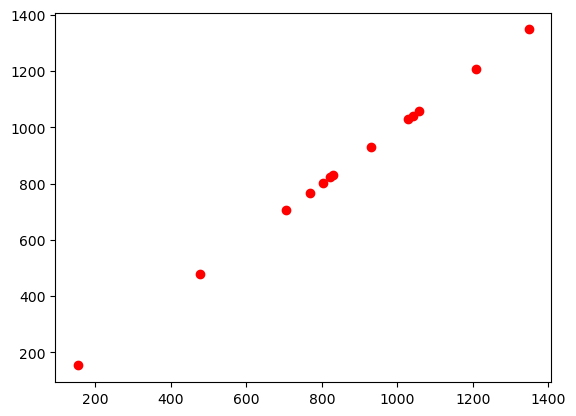

In [20]:
plt.plot(CalcS_Fe3['SCSS_Tot'], CalcS['SCSS_Tot'], 'or')

## Using it with Oneill sulfide composition

In [21]:
Ni_Liq=Liq['logfO2']*0+500
Cu_Liq=Liq['logfO2']*0+100

CalcS_Oneill=ss.calculate_LZ2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
 Fe_FeNiCu_Sulf="Calc_ONeill", logfo2=logfo2, Ni_Liq=Ni_Liq, Cu_Liq=Cu_Liq)

In [22]:
CalcS_Oneill.to_clipboard(excel=True)

In [23]:
Liq.to_clipboard(excel=True)

In [24]:
Ni_Liq=Liq['logfO2']*0+500
Cu_Liq=Liq['logfO2']*0+100

CalcS_Smythe=ss.calculate_LZ2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
 Fe_FeNiCu_Sulf="Calc_Smythe", logfo2=logfo2, Ni_Liq=Ni_Liq, Cu_Liq=Cu_Liq)

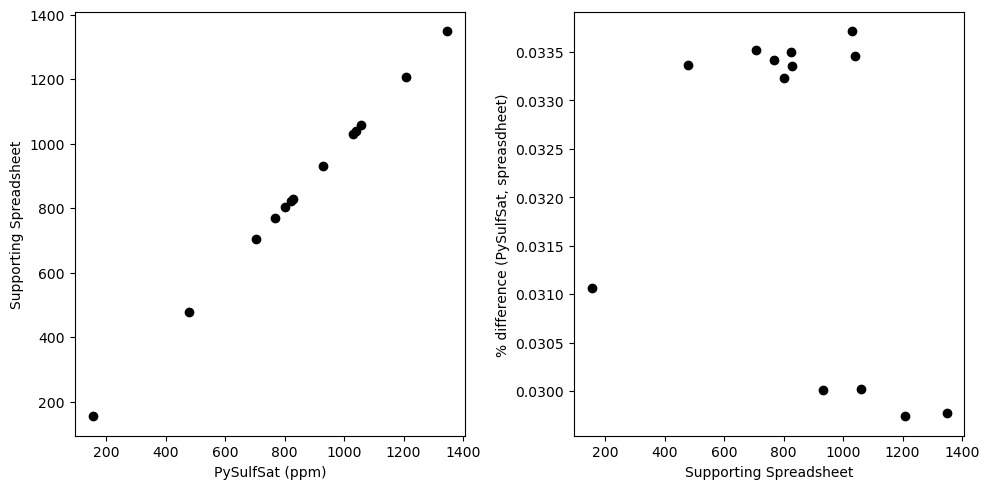

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(CalcS['SCSS_Tot'], Liq['S total cal'], 'ok')
ax2.plot(Liq['S total cal'], 100-100*CalcS['SCSS_Tot']/Liq['S total cal'],  'ok')
ax1.set_xlabel('PySulfSat (ppm)')
ax1.set_ylabel('Supporting Spreadsheet')
ax2.set_ylabel('% difference (PySulfSat, spreasdheet)')
ax2.set_xlabel('Supporting Spreadsheet')
ax2.ticklabel_format(useOffset=False)
fig.tight_layout()

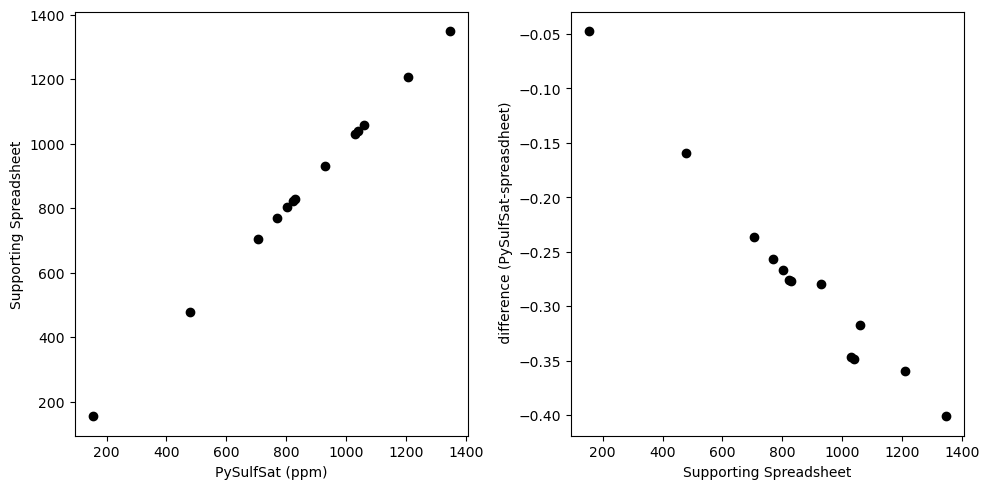

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(CalcS['SCSS_Tot'], Liq['S total cal'], 'ok')
ax2.plot(Liq['S total cal'],CalcS['SCSS_Tot']-Liq['S total cal'],  'ok')
ax1.set_xlabel('PySulfSat (ppm)')
ax1.set_ylabel('Supporting Spreadsheet')
ax2.set_ylabel(' difference (PySulfSat-spreasdheet)')
ax2.set_xlabel('Supporting Spreadsheet')
ax2.ticklabel_format(useOffset=False)
fig.tight_layout()

## Changing H2O - doesnt do anything, as normalized

In [27]:
Liq_H2O=Liq.copy()
Liq_H2O['H2O_Liq']=5
CalcS_H2O=ss.calculate_LZ2022_SCSS(df=Liq_H2O, T_K=T_K, P_kbar=P_kbar,  Fe_FeNiCu_Sulf=FeFeNiCu, logfo2=logfo2)
CalcS.head()

,SCSS_Tot,Fe_FeNiCu_Sulf,Fe3Fet_Liq,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe/(Fe+Cu+Ni),H2O_Liq,S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2
0,1040.063853,0.999559,0.058107,FeS,10000.0,1250,-2.0,-9.243243,51.28,0.89,17.13,7.13,NaN,7.19,10.69,2.58,0.83,NaN,0.999559,0.0,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN
1,1028.919360,0.928749,0.056223,Fe90,10000.0,1250,-2.0,-9.243243,50.99,0.71,16.85,8.51,NaN,7.08,10.35,2.51,0.84,NaN,0.928749,0.0,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN
2,828.809696,0.788135,0.057926,Fe80,10000.0,1250,-2.0,-9.243243,49.60,1.11,17.33,6.88,NaN,7.23,10.57,2.53,0.80,NaN,0.788135,0.0,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN
3,801.751233,0.800000,0.058776,Fe80-24h,10000.0,1250,-2.0,-9.243243,50.34,1.09,17.29,5.92,NaN,7.21,10.51,2.54,0.80,NaN,0.800000,0.0,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN
4,822.488335,0.800000,0.057736,Fe80-3h,10000.0,1250,-2.0,-9.243243,52.68,1.09,16.88,6.95,NaN,7.41,10.52,2.53,0.81,NaN,0.800000,0.0,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN
